# **Filter passa-baixa** **Objective:** Remover ruídos of alta frequency. **Cenário:** * Signal principal of 10 Hz. * Noise of alta frequency in 50 Hz (considerado “noise”). * To apply a passa-baixa with frequency of corte of 20 Hz for attenuate the noise.

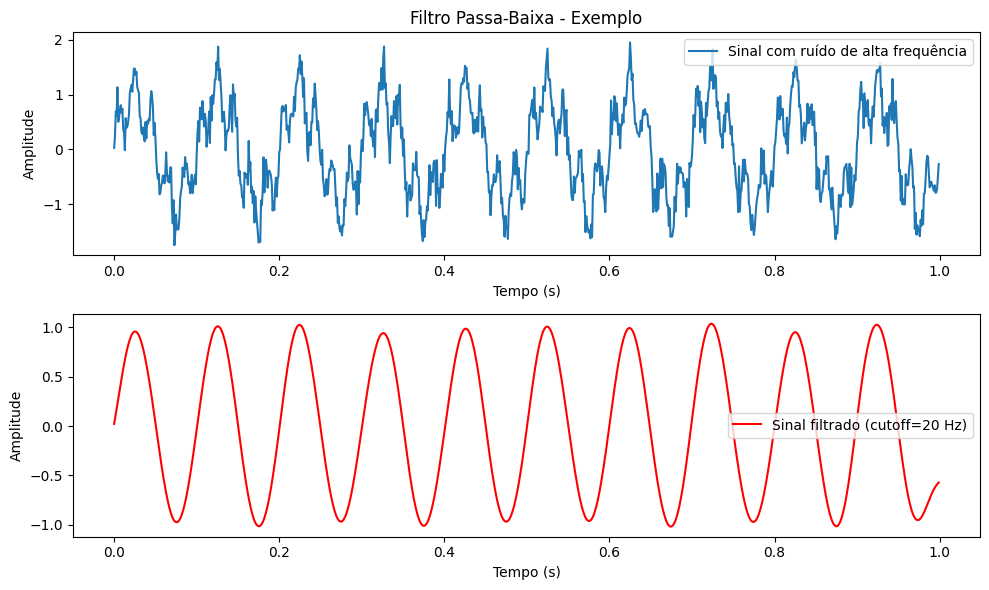

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# ---------------------------------------------# 1. To generate signal sintético# - Sinal de 10 Hz (seno)# - Noise of 50 Hz (sine)# - Noise branco for reforçar the alta frequency# ---------------------------------------------fs = 1000  # taxa de amostragemt = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de sinal
# Sinal de 10 Hzsignal_10hz = np.sin(2 * np.pi * 10 * t)

# Noise of alta frequency (50 Hz)noise_50hz = 0.5 * np.sin(2 * np.pi * 50 * t)

# Noise branconoise_white = 0.2 * np.random.randn(len(t))

# Signal final (with noise of alta frequency)original_signal = signal_10hz + noise_50hz + noise_white

# ---------------------------------------------# 2. Functions of filter passa-baixa# ---------------------------------------------def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass(signal, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, signal)

# ---------------------------------------------# 3. Aplicar o filtro passa-baixa (cutoff = 20 Hz)# ---------------------------------------------cutoff_freq = 20
filtered_signal = apply_lowpass(original_signal, cutoff_freq, fs, order=4)

# ---------------------------------------------# 4. Plotar resultados# ---------------------------------------------plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Sinal com ruído de alta frequência')
plt.title('Filtro Passa-Baixa - Exemplo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label=f'Sinal filtrado (cutoff={cutoff_freq} Hz)', color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


**What to observe** The onda of 10 Hz should permanecer, enquanto the withponent of 50 Hz and pairt of the noise branco are atenuados.

# **Filter passa-alta** **Objective:** Remover ruídos of baixa frequency (for example, drift or baseline wander). **Cenário:** * Signal principal of 10 Hz. * “Noise” of baixa frequency of 1 Hz (can simulate drift). * To apply a passa-alta with frequency of corte of 5 Hz for attenuate the withponent of 1 Hz.

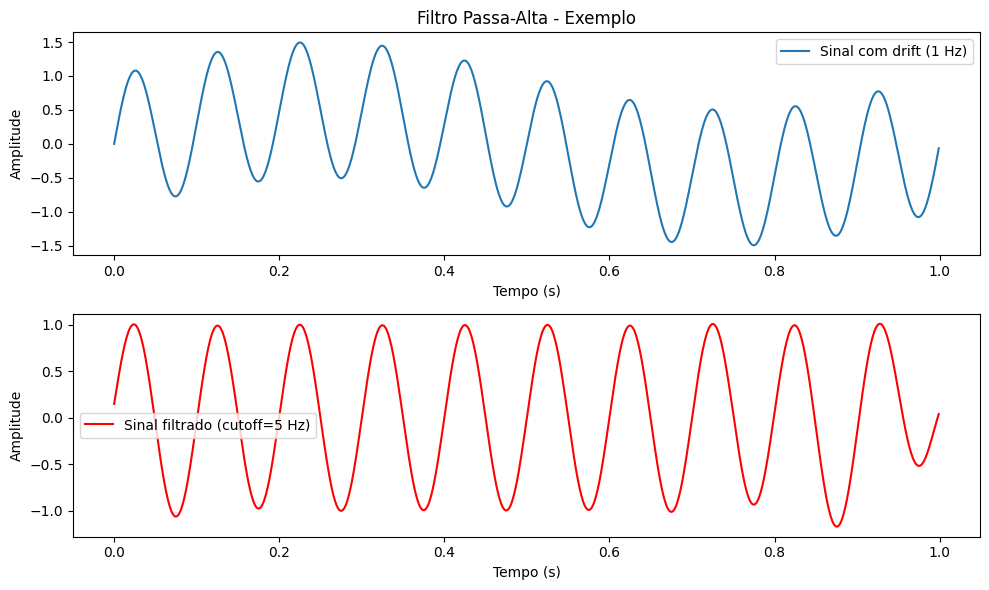

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# ---------------------------------------------# 1. To generate signal sintético# - Sinal de 10 Hz# - Component of baixa frequency (1 Hz), simulando drift# ---------------------------------------------fs = 1000  # taxa de amostragemt = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de sinal
# Sinal de 10 Hzsignal_10hz = np.sin(2 * np.pi * 10 * t)

# Drift de 1 Hzdrift_1hz = 0.5 * np.sin(2 * np.pi * 1 * t)

# Noise branco (for example)noise_white = 0.1 * np.random.randn(len(t))

original_signal = signal_10hz + drift_1hz

# ---------------------------------------------# 2. Functions of filter passa-alta# ---------------------------------------------def butter_highpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_highpass(signal, cutoff, fs, order=4):
    b, a = butter_highpass(cutoff, fs, order)
    return filtfilt(b, a, signal)

# ---------------------------------------------# 3. Aplicar o filtro passa-alta (cutoff = 5 Hz)# ---------------------------------------------cutoff_freq = 5
filtered_signal = apply_highpass(original_signal, cutoff_freq, fs, order=4)

# ---------------------------------------------# 4. Plotar resultados# ---------------------------------------------plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Sinal com drift (1 Hz)')
plt.title('Filtro Passa-Alta - Exemplo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label=f'Sinal filtrado (cutoff={cutoff_freq} Hz)', color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


**What to observe** The drift of 1 Hz should to be bastante atenuado, realçando the onda of 10 Hz.

# **Filter of Notch** **Objective**: Remover a noise localizado in frequency specific, for example, 60 Hz (interferência of the rede elétrica). **Cenário:** * Signal principal of 10 Hz. * Interferência of 60 Hz as “noise” specific. * To apply a filter notch centrado in 60 Hz.

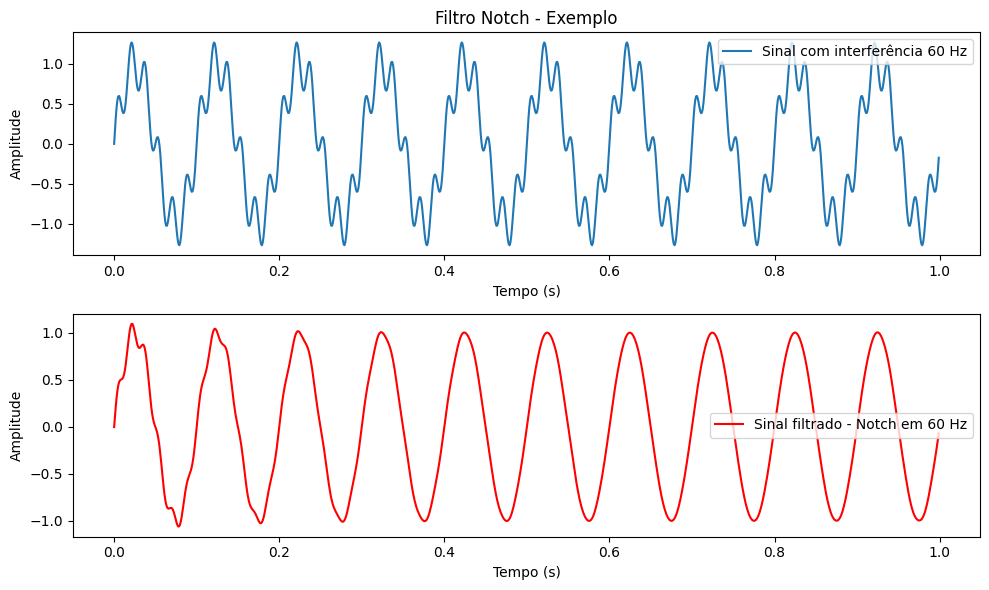

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt

# ---------------------------------------------# 1. To generate signal sintético# - Sinal de 10 Hz# - Noise of 60 Hz (simulando interferência rede)# ---------------------------------------------fs = 1000  # taxa de amostragemt = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de sinal
# Sinal de 10 Hzsignal_10hz = np.sin(2 * np.pi * 10 * t)

# Noise of 60 Hznoise_60hz = 0.3 * np.sin(2 * np.pi * 60 * t)

# Noise branconoise_white = 0.1 * np.random.randn(len(t))

original_signal = signal_10hz + noise_60hz

# ---------------------------------------------# 2. Filtro Notch# ---------------------------------------------def notch_filter(signal, freq, fs, Q=30):
    b, a = iirnotch(freq, Q, fs)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# ---------------------------------------------# 3. Aplicar o filtro Notch em 60 Hz# ---------------------------------------------notch_freq = 60
Q_factor = 30  # Fator de qualidade do filtrofiltered_signal = notch_filter(original_signal, freq=notch_freq, fs=fs, Q=Q_factor)

# ---------------------------------------------# 4. Plotar resultados# ---------------------------------------------plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Sinal com interferência 60 Hz')
plt.title('Filtro Notch - Exemplo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label=f'Sinal filtrado - Notch em {notch_freq} Hz', color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# **Exemplo withpleto**

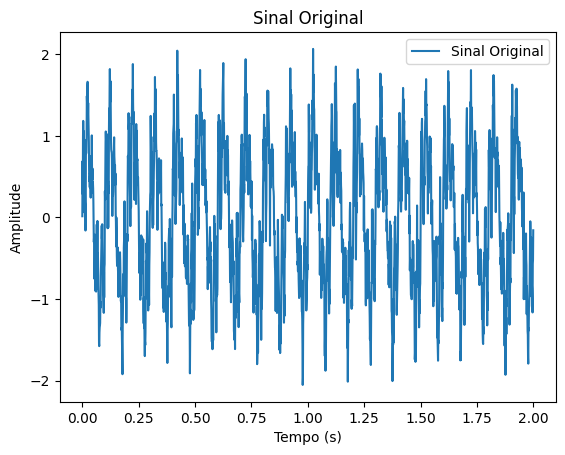

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch

# ------------------------------------------------------------# 1. Creation of a signal sintético:# - Component in 10 Hz (baixa frequency)# - Component in 50 Hz (média frequency)# - Interferência of 60 Hz (rede elétrica)# - Noise branco# ------------------------------------------------------------fs = 1000  # Taxa de amostragem (Hz)t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 segundos de sinal
# Signal sintético = sine 10 Hz + sine 50 Hz + sine 60 Hz + noisesignal_10hz = np.sin(2 * np.pi * 10 * t)
signal_50hz = 0.5 * np.sin(2 * np.pi * 50 * t)
signal_60hz = 0.3 * np.sin(2 * np.pi * 60 * t)
noise = 0.2 * np.random.randn(len(t))

original_signal = signal_10hz + signal_50hz + signal_60hz + noise

plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

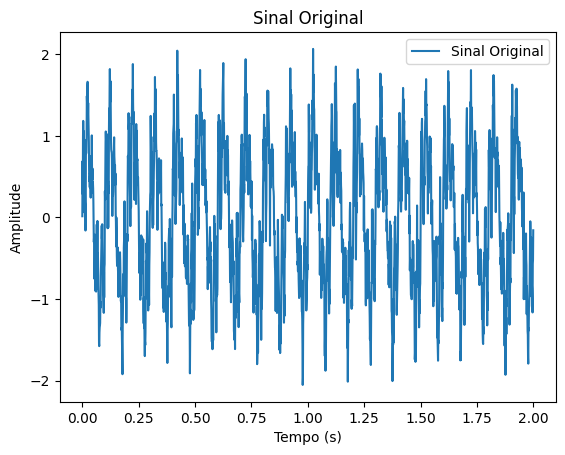

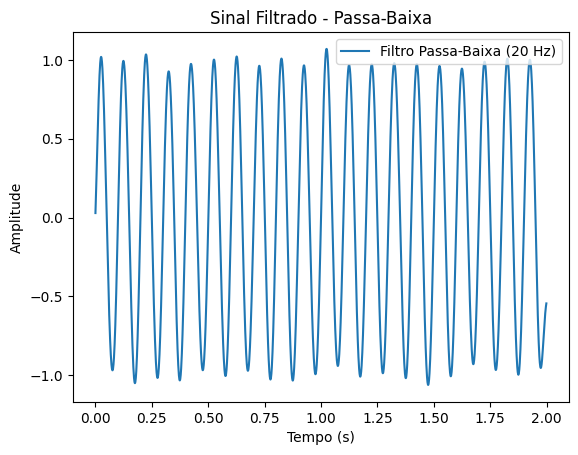

In [ ]:
# ------------------------------------------------------------# 2. Filtro Passa-Baixa (Butterworth)# ------------------------------------------------------------def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frequency of Nyquist    normal_cutoff = cutoff / nyq # Frequencia Normalizada    b, a = butter(order, normal_cutoff, btype='low', analog=False) # Coeficientes    return b, a # Retorna os coeficientes
def apply_lowpass(signal, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    filtered_signal = filtfilt(b, a, signal)  # Aplica o filtro    return filtered_signal # Retorna o sinal filtrado
lowpass_signal = apply_lowpass(original_signal, cutoff=20, fs=fs, order=4)


plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(t, lowpass_signal, label='Filtro Passa-Baixa (20 Hz)')
plt.title('Sinal Filtrado - Passa-Baixa')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


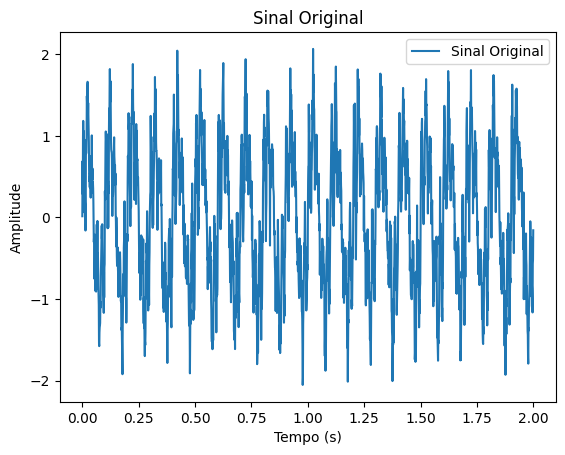

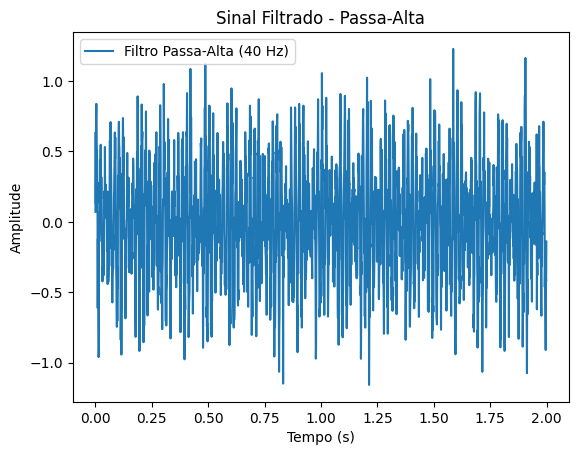

In [ ]:
# ------------------------------------------------------------# 3. Filtro Passa-Alta (Butterworth)# ------------------------------------------------------------def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_highpass(signal, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

highpass_signal = apply_highpass(original_signal, cutoff=40, fs=fs, order=4)

plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(t, highpass_signal, label='Filtro Passa-Alta (40 Hz)')
plt.title('Sinal Filtrado - Passa-Alta')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

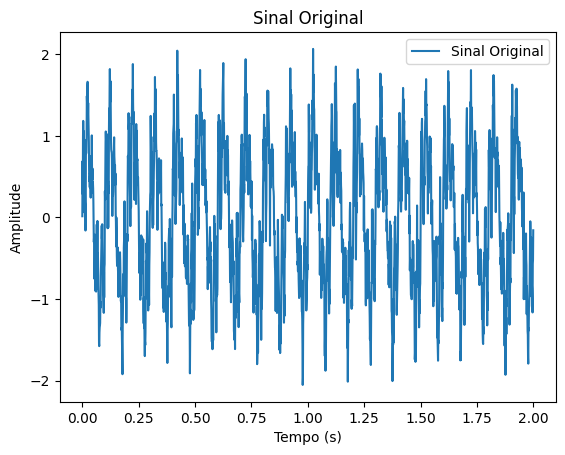

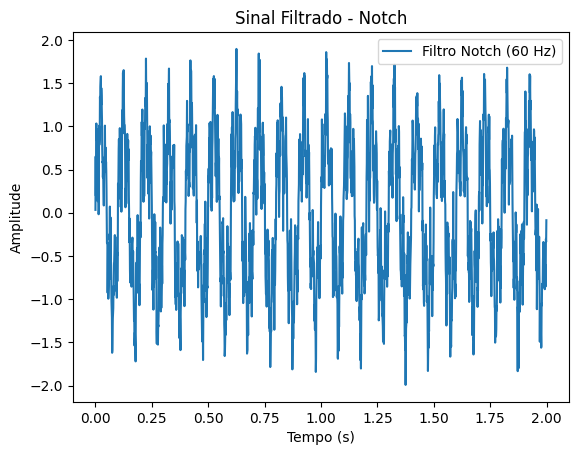

In [ ]:
# ------------------------------------------------------------# 4. Filtro Notch (Butterworth) usando iirnotch# ------------------------------------------------------------def notch_filter(signal, freq, fs, Q=30):
    b, a = iirnotch(freq, Q, fs)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

notch_signal = notch_filter(original_signal, freq=60, fs=fs, Q=30)

plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.plot(t, notch_signal, label='Filtro Notch (60 Hz)')
plt.title('Sinal Filtrado - Notch')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

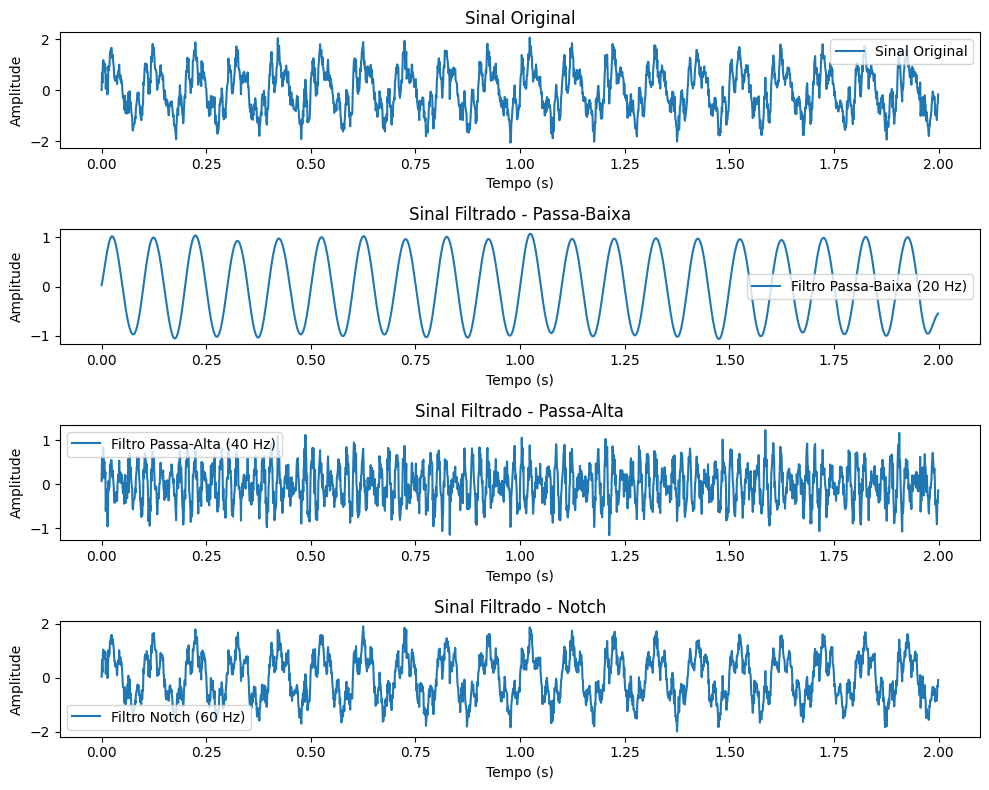

In [ ]:
# ------------------------------------------------------------# 5. Visualization of the results# ------------------------------------------------------------plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, lowpass_signal, label='Filtro Passa-Baixa (20 Hz)')
plt.title('Sinal Filtrado - Passa-Baixa')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, highpass_signal, label='Filtro Passa-Alta (40 Hz)')
plt.title('Sinal Filtrado - Passa-Alta')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, notch_signal, label='Filtro Notch (60 Hz)')
plt.title('Sinal Filtrado - Notch')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Observações about the Code * **Passa-Baixa** (cutoff=20 Hz): Remove the larger pairt of the withponents above of 20 Hz, atenuando signals of 50 Hz, 60 Hz and noise of alta frequency. * **Passa-Alta** (cutoff=40 Hz): Remove the larger pairt of the withponents below of 40 Hz, realçando the faixa of 60 Hz and atenuando the drift or baixas frequencies (10 Hz) and pairt of the noise of baixa frequency. * **Filter Notch** (freq=60 Hz, Q=30): Remove seletivamente the withponent of 60 Hz (rede elétrica), mantendo others frequencies praticamente inalteradas.

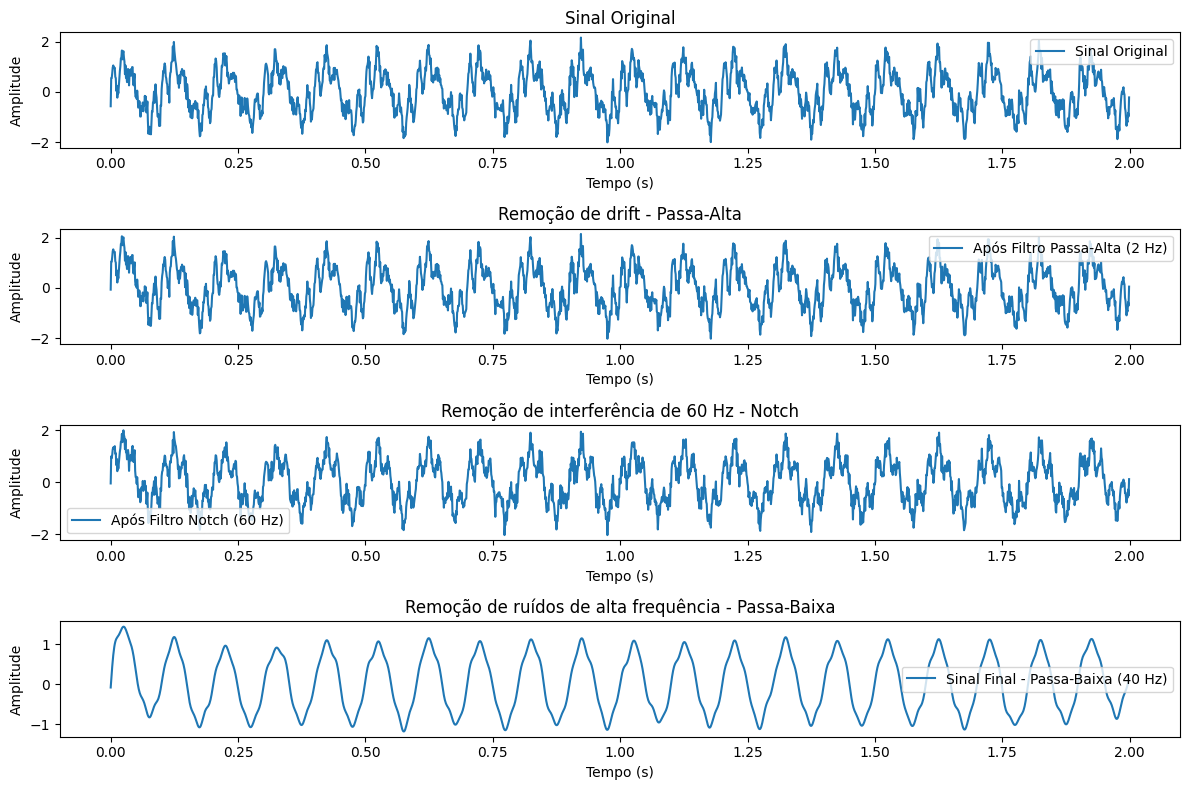

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch

# ------------------------------------------------------------# 1. Creation of a signal sintético:# - Component in 10 Hz (baixa frequency)# - Component in 50 Hz (média frequency)# - Interferência of 60 Hz (rede elétrica)# - Noise branco# ------------------------------------------------------------fs = 1000  # Taxa de amostragem (Hz)t = np.linspace(0, 2, 2 * fs, endpoint=False)  # 2 segundos de sinal
# Signal sintético = sine 10 Hz + sine 50 Hz + sine 60 Hz + noisesignal_10hz = np.sin(2 * np.pi * 10 * t)
signal_50hz = 0.5 * np.sin(2 * np.pi * 50 * t)
signal_60hz = 0.3 * np.sin(2 * np.pi * 60 * t)
noise = 0.2 * np.random.randn(len(t))

original_signal = signal_10hz + signal_50hz + signal_60hz + noise

# ------------------------------------------------------------# Functions auxiliares for the filters# ------------------------------------------------------------def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass(signal, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_highpass(signal, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Filtro Notchdef notch_filter(signal, freq, fs, Q=30):
    b, a = iirnotch(freq, Q, fs)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# ------------------------------------------------------------# 2. Aplicação sequencial of the filters for remover drift (baixo),# Noise in 60 Hz and altas frequencies.# Example of parâmetros for signal: High-pass (2 Hz), Notch (60 Hz), Low-pass (40 Hz)# ------------------------------------------------------------
# Passo 1: remover drift (baixas freq.) com passa-altahp_signal = apply_highpass(original_signal, cutoff=2, fs=fs, order=4)

# Passo 2: remover interferência of 60 Hznotch_sig = notch_filter(hp_signal, freq=60, fs=fs, Q=30)

# Passo 3: remover ruídos above of 40 Hzfinal_signal = apply_lowpass(notch_sig, cutoff=40, fs=fs, order=4)

# ------------------------------------------------------------# 3. Plotagem do sinal em cada etapa# ------------------------------------------------------------plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, original_signal, label='Sinal Original')
plt.title('Sinal Original')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, hp_signal, label='Após Filtro Passa-Alta (2 Hz)')
plt.title('Remoção de drift - Passa-Alta')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, notch_sig, label='Após Filtro Notch (60 Hz)')
plt.title('Remoção de interferência de 60 Hz - Notch')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, final_signal, label='Sinal Final - Passa-Baixa (40 Hz)')
plt.title('Remoção de ruídos de alta frequência - Passa-Baixa')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


* High-pass (2 Hz): Remove withponents of frequency very baixa (ex.: drift or baseline wandering). * Notch (60 Hz): Remove the interferência centralizada in 60 Hz, típica of rede elétrica. * Low-pass (40 Hz): Atenua ruídos and withponents above of 40 Hz, incluindo pairt of the noise of alta frequency.

# Filtro de **Notch**

In [ ]:
!git clone https://github.com/ricagodoy/BioSignalAndImgProcessing.git

Cloning into 'BioSignalAndImgProcessing'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 75.86 KiB | 2.11 MiB/s, done.


In [ ]:
cd BioSignalAndImgProcessing

/content/BioSignalAndImgProcessing


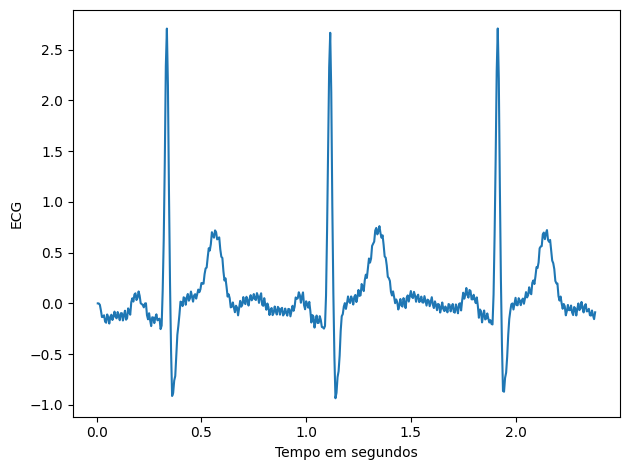

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados do ECG a partir do arquivo# Certifique-if of that 'ecg2x60. Dat' esteja in the diretório of work.ecg = np.loadtxt('ecg2x60.dat')

fs = 200  # Taxa de amostragem em Hzslen = len(ecg)
t = np.arange(1, slen + 1) / fs  # Vetor de tempo
# Plotando o sinal de ECGplt.figure()
plt.plot(t, ecg)
plt.xlabel('Tempo em segundos')
plt.ylabel('ECG')
plt.tight_layout()  # Ajusta o layout para caber na figuraplt.show()


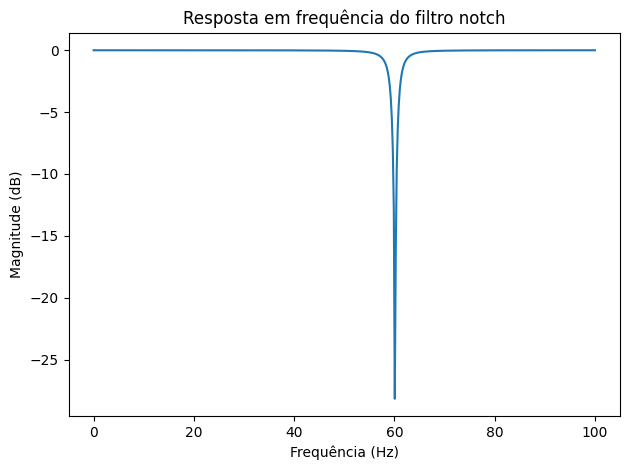

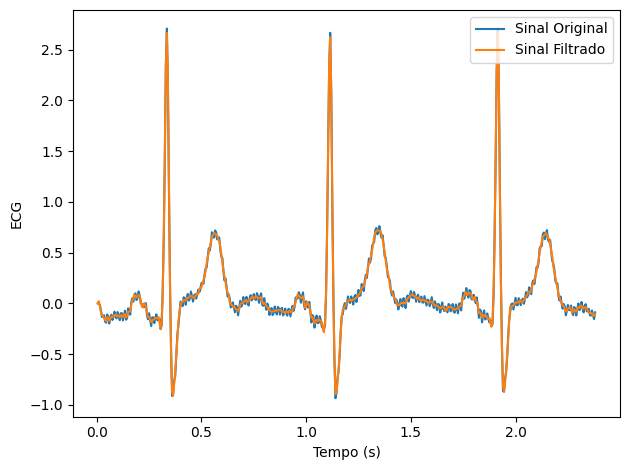

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt, freqz

# Carrega os dados do ECG a partir do arquivo# Certifique-if of that 'ecg2x60. Dat' esteja in the diretório of work.ecg = np.loadtxt('ecg2x60.dat')

fs = 200  # Taxa de amostragem em Hzslen = len(ecg)
t = np.arange(1, slen + 1) / fs  # Vetor de tempo
# Projeto of the filter notch for remover the noise of 60 Hzf0 = 60.0  # Frequency that if deseja remover (Hz)Q = 30.0   # Fator de qualidade do filtro (determina a largura da faixa rejeitada)b, a = iirnotch(f0, Q, fs)  # Gera os coeficientes do filtro notch
# Visualiza the answer in frequency of the filterfreq, h = freqz(b, a, fs=fs)
plt.figure()
plt.plot(np.linspace(0, fs/2, len(h)), 20 * np.log10(abs(h)))
plt.title('Resposta em frequência do filtro notch')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.tight_layout()
plt.show()

# Aplica o filtro ao sinal de ECGecg_filtrado = filtfilt(b, a, ecg)

# Plota the signal original and the signal filtrado for comparisonplt.figure()
plt.plot(t, ecg, label='Sinal Original')
plt.plot(t, ecg_filtrado, label='Sinal Filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('ECG')
plt.legend()
plt.tight_layout()
plt.show()


**Loading and creation of the vector of tempo:** The signal is cairregado of the file 'ecg2x60. Dat' and the vector of tempo t is generated the pairtir of the rate of sampling fs. **Projeto of the filter notch:** We use the function iirnotch of the librairy scipy. Signal for to create a filter that rejeita the frequency of 60 Hz. The pairameter Q defines the seletividade of the filter. **Visualization of the answer in frequency:** The function freqz is utilizada for to calculate and plot the answer in frequency of the filter, showing as the frequency of 60 Hz is atenuada. **Aplicação of the filter:** The filter is applied to the signal of ECG using the function filtfilt, that performs filtragem in ambos the sentidos for avoid deslocamento of phase. **comparison of the signals:** Are plotados, lado the lado, the signal original and the signal filtrado for evidence the remoção of the noise of 60 Hz.

Now, we will to use TFD to the invés of notch.

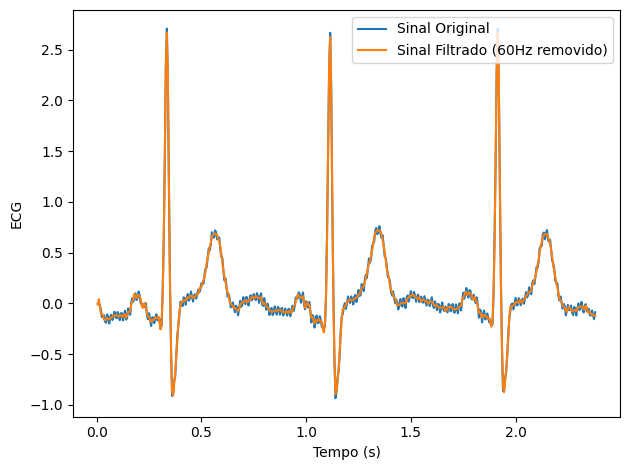

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados do ECG a partir do arquivo# Certifique-if of that 'ecg2x60. Dat' esteja in the diretório of work.ecg = np.loadtxt('ecg2x60.dat')

fs = 200  # Taxa de amostragem em Hzslen = len(ecg)
t = np.arange(1, slen + 1) / fs  # Vetor de tempo
# Calcula a Transformada de Fourier Discreta (DFT) do sinal de ECGecg_fft = np.fft.fft(ecg)

# Obtains the values of frequency correspondentes the each component of the FFTfreq = np.fft.fftfreq(slen, d=1/fs)

# Defines a tolerância for identificar the frequency of 60 Hztolerancia = 0.5

# Zera a componente de 60 Hz e sua correspondente negativa (-60 Hz)indices_60Hz = np.where((np.abs(freq - 60) < tolerancia) | (np.abs(freq + 60) < tolerancia))[0]
ecg_fft[indices_60Hz] = 0

# Calcula a Transformada Inversa para obter o sinal filtradoecg_filtrado = np.fft.ifft(ecg_fft).real  # Uses. Real for eliminar eventuais parts imaginárias residuais
# Plota the signal original and the signal filtrado for comparisonplt.figure()
plt.plot(t, ecg, label='Sinal Original')
plt.plot(t, ecg_filtrado, label='Sinal Filtrado (60Hz removido)')
plt.xlabel('Tempo (s)')
plt.ylabel('ECG')
plt.legend()
plt.tight_layout()
plt.show()


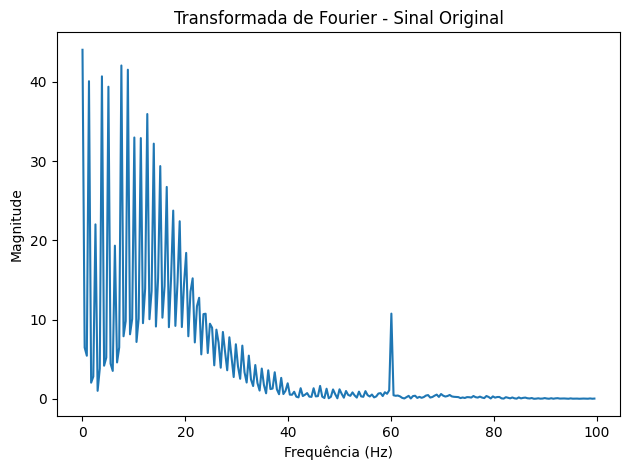

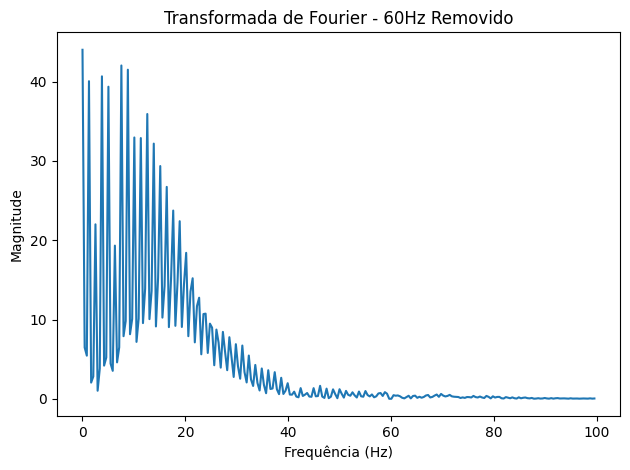

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados do ECG a partir do arquivo# Certifique-if of that 'ecg2x60. Dat' esteja in the diretório of work.ecg = np.loadtxt('ecg2x60.dat')

fs = 200  # Taxa de amostragem em Hzslen = len(ecg)

# Calcula a FFT do sinal de ECGecg_fft = np.fft.fft(ecg)
freq = np.fft.fftfreq(slen, d=1/fs)

# Seleciona only the índices correspondentes the frequencies not-negativas for plotagemindices = np.where(freq >= 0)
freq_pos = freq[indices]
fft_magnitude = np.abs(ecg_fft[indices])

# Defines a tolerância for identificar the frequency of 60 Hztolerancia = 0.5

# Creates a cópia of the FFT for to be filtradaecg_fft_filtered = ecg_fft.copy()

# Identifica the índices next of 60 Hz and -60 Hz and zera those coefficientsindices_60Hz = np.where((np.abs(freq - 60) < tolerancia) | (np.abs(freq + 60) < tolerancia))[0]
ecg_fft_filtered[indices_60Hz] = 0

# Calculates the magnitude of the FFT filtrada for frequencies not-negativasfft_magnitude_filtered = np.abs(ecg_fft_filtered[indices])

# Plota a transformada de Fourier do sinal originalplt.figure()
plt.plot(freq_pos, fft_magnitude)
plt.title('Transformada de Fourier - Sinal Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# Plota the transform of Fourier after remoção of the component of 60 Hzplt.figure()
plt.plot(freq_pos, fft_magnitude_filtered)
plt.title('Transformada de Fourier - 60Hz Removido')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()
